<a href="https://colab.research.google.com/github/Blake2912/Vahini-Phase-1/blob/phase-2-path-finding/OurPath_Vahini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install osmnx networkx shapely

In [6]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Polygon

In [12]:
## Using boundbox

north, south, east, west = 12.96768338736144,12.965518842636625,77.71393642911939,77.71046157295785
# cmrit lat long bounds 0
# north (float) – northern latitude of bounding box: 12.96768338736144
# south (float) – southern latitude of bounding box: 12.965518842636625
# east (float) – eastern longitude of bounding box: 77.71393642911939
# west (float) – western longitude of bounding box: 77.71046157295785
network_type = 'all_private' # "all_private", "all", "bike", "drive", "drive_service", "walk"

G = ox.graph_from_bbox(
      north, south, east, west, 
      network_type=network_type, 
      simplify=True, 
      retain_all=False, 
      truncate_by_edge=False, 
      clean_periphery=True, 
      custom_filter=None)
# Create a graph from OSM within some bounding box.
def plot():
  # Plot a graph.
  fig, ax = ox.plot_graph(G)

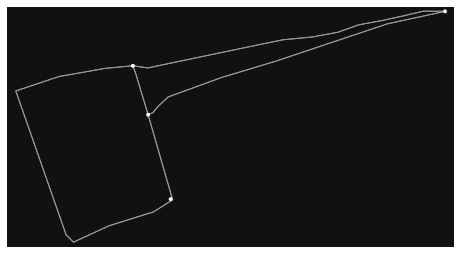

In [20]:
plot()

In [21]:
G.add_node('basic_science',y= 12.96626, x=77.71211,street_count = 3) # we can add nodes like this..

In [22]:
# nodes
[G.nodes[x] for x in G]

[{'y': 12.967455, 'x': 77.7139021, 'street_count': 3},
 {'y': 12.9667974, 'x': 77.711963, 'street_count': 3},
 {'y': 12.9671086, 'x': 77.7118638, 'street_count': 3},
 {'y': 12.96626, 'x': 77.71211, 'street_count': 3}]

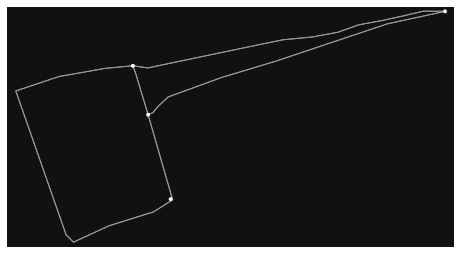

In [23]:
plot()

In [24]:
# finding shortest route

start_latlng = (12.967455,77.7139021)

end_latlng = (12.966229089103756, 77.7121607793537)
import networkx as nx
optimizer = 'time'
orig_node = ox.distance.nearest_nodes(G, start_latlng[1], start_latlng[0])
# find the nearest node to the end location
dest_node = ox.distance.nearest_nodes(G, end_latlng[1], end_latlng[0])
#  find the shortest path
shortest_route = nx.shortest_path(G, orig_node, dest_node, weight=optimizer)

# print(shortest_route)
shortest_route_map = ox.plot_route_folium(G, shortest_route)
# # This saves it on html file to view it easily
shortest_route_map.save('route.html')

NetworkXNoPath: ignored

**No path between 3798918923 and basic_science**




we have to resolve this